## Problem Statement
### Predict delivery time using sorting time

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

### Loading the dataset

In [3]:
delivery = pd.read_csv("delivery_time.csv")

In [4]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
delivery.shape

(21, 2)

The dataset comprises of 21 observations and 2 features/variables. So, we have one variable which is independent and one is dependent.
We need to predict the Delivery time value based on the Sorting time here. So, Delivery time is dependent variable (target) and Sorting time is independent variable in our case.

In [6]:
delivery.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [7]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
delivery[delivery.duplicated()]

,Delivery Time,Sorting Time


We don't have any duplicate values in our dataset. If duplicates values would have been present we would have to delete it.

### Summary 

In [9]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Observations :-
1.The mean value and the median value (50% or percentile) are not having much difference between them.

2.Also there is not a big difference in the 75% value and max value for both the features

3.From observations, 1 and 2 we can say that there is no outlier in the dataset.

### Understanding target variables

Our target variable is Delivery time and we need to predict the Delivery time based on the Sorting time

In [10]:
delivery['Delivery Time'].unique()

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

### Observations :-

The Delivery time variable here is a continuous variable and is numerical data

In [11]:
delivery['Delivery Time'].value_counts()

16.68    1
19.83    1
13.50    1
19.75    1
24.00    1
29.00    1
19.00    1
9.50     1
18.75    1
10.75    1
15.35    1
14.88    1
11.50    1
13.75    1
8.00     1
12.03    1
21.50    1
18.11    1
17.90    1
17.83    1
21.00    1
Name: Delivery Time, dtype: int64

### Observations:-

We could see that all the observations have only 1 count which means they are unique. There are no duplicates in our data

### Data visualization

Performing univariate analysis using boxplot. Boxplots are very intuitive for checking any outlier data 

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery Time'>

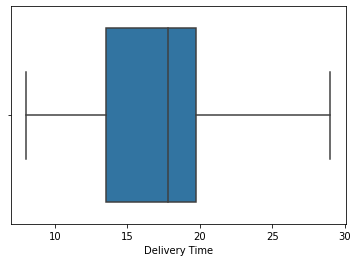

In [13]:
sn.boxplot(delivery['Delivery Time'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting Time'>

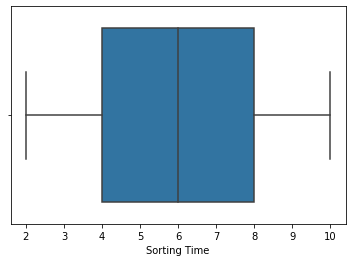

In [14]:
sn.boxplot(delivery['Sorting Time'])

### Observations :-
1.There are no outliers in both Delivery time and Sorting time variables. So, we are good to proceed with our model prediction part. The outliers usually reduces the accuracy the model and might give incorrect predictions results.

2.By observing the box plot of Delivery Time we can also see that the median line of the plot is slight towards the lower portion of the box. We can say that the data points are negatively skewed.

We will plot a density plot which also helps the see the distribution of the data and give insight regarding skewness.

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

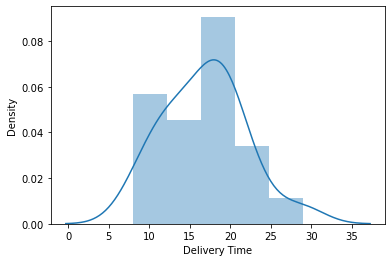

In [15]:
sn.distplot(delivery['Delivery Time'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

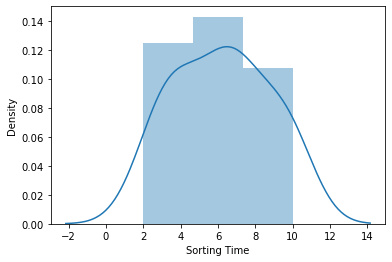

In [16]:
sn.distplot(delivery['Sorting Time'])

### Observations :-

1.In the density plot of Delivery time, we can observe a slight negative skewness.

2.The density plot of Sorting time is a bell shaped curve and looks like it is normal distribution


### Pair Plots

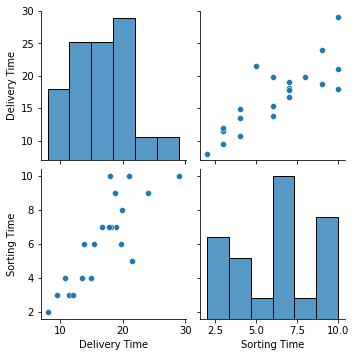

In [17]:
sn.pairplot(delivery)

### Observations :-
There is a positive correlation between the Delivery time and the Sorting time. We can see Delivery time increases as sorting time increases and vice versa

### Heatmap
Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data

<AxesSubplot:>

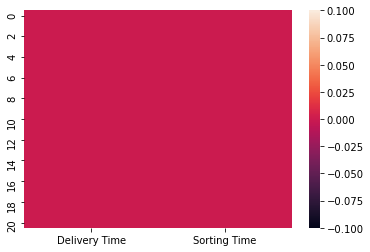

In [18]:
sn.heatmap(delivery.isnull())

### Observations :-
We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background.

We can check missing values by using isna() method as well.

In [19]:
delivery.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

## Correlation

The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship (correlation) between various variables and make decisions accordingly.

<AxesSubplot:>

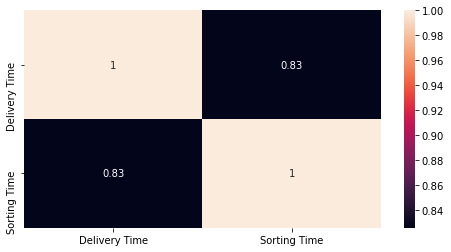

In [20]:
plt.figure(figsize=(8,4))
sn.heatmap(delivery.corr(),annot = True)

### Observations :-

The correlation value between Delivery time and Sorting Time is 0.83 which is not very much high. It is a positive correlation.

## Finding correlation

In [21]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


We can find the correlation values directly by corr() method. The value is 0.83 and we can say Delivery Time and Sorting Time are having less correlation.



## Fitting a linear regression model

We need to predict the Delivery time based on the Sorting time. We have one dependent variable Delivery time and and one independent Sorting Time. So we can use linear regression algorithm to predict and fit the line.

In [22]:
delivery_new = delivery.rename(columns={'Delivery Time':'DT'})

In [23]:
delivery_new1 = delivery_new.rename(columns={'Sorting Time':'ST'})

In [24]:
delivery_new1

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [25]:
model = smf.ols('DT~ST',delivery_new1).fit()

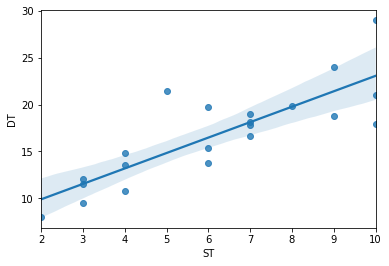

In [26]:
sn.regplot(x="ST", y="DT",data=delivery_new1);

### Coeffecients of model

In [27]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

### t and p values

In [28]:
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


### R squared values

In [29]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

### Predict the Delivery time for new Sorting time values

In [30]:
newdata = pd.Series([12,14,16])

Creating a new series for Sorting time with values 12,14 and 16. We will using these data points and predict the Delivery time.

In [31]:
ST_newdata = pd.DataFrame(newdata,columns=['ST'])

In [32]:
ST_newdata

,ST
0,12
1,14
2,16


In [33]:
model.predict(ST_newdata)

0    26.370973
1    29.669013
2    32.967052
dtype: float64

For Sorting time values of 12,14 and 16 we get the Delivery time predicted values as 26.37, 29.67 and 32.97 respectively.

## Problem Statement 2

### Salary_hike -> Build a prediction model for Salary_hike



### Importing the libraries

In [34]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

### Loading the dataset

In [35]:
salary = pd.read_csv("Salary_Data.csv")

In [36]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [37]:
salary.shape

(30, 2)

In [38]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [39]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [40]:
salary[salary.duplicated()]

,YearsExperience,Salary


We don't have any duplicate values in our dataset. If duplicates values would have been present we would have to delete it.

### Summary

In [41]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Observations :-

1.The mean value and the median value (50% or percentile) are not having much difference between them.

2.Also there is not a big difference in the 75% value and max value for both the features

3.From observations, 1 and 2 we can say that there are no outliers in the dataset.

### Understanding target variable

Our target variable is Salary and we need to predict the Salary based on the number of years of experience



In [42]:
salary['Salary'].unique()


array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

### Observations :-

The Salary variable here is a continuous variable and is numerical data

In [43]:
salary['Salary'].value_counts()

109431.0    1
37731.0     1
56957.0     1
57081.0     1
63218.0     1
91738.0     1
98273.0     1
46205.0     1
60150.0     1
105582.0    1
122391.0    1
64445.0     1
121872.0    1
112635.0    1
93940.0     1
39891.0     1
81363.0     1
57189.0     1
61111.0     1
56642.0     1
43525.0     1
101302.0    1
66029.0     1
55794.0     1
54445.0     1
39343.0     1
116969.0    1
67938.0     1
113812.0    1
83088.0     1
Name: Salary, dtype: int64

### Observations :-

We could see that all the observations have only 1 count which means they are unique. There are no duplicates in our data



### Data visualization

Performing univariate analysis using boxplot. Boxplots are very intuitive for checking any outlier data

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

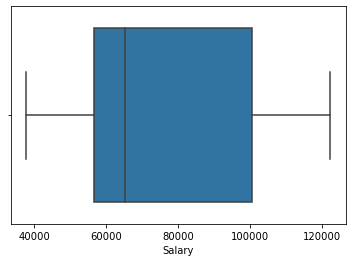

In [44]:
sn.boxplot(salary['Salary'])


C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

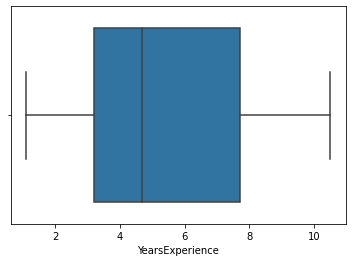

In [45]:
sn.boxplot(salary['YearsExperience'])

### Observations :-

1.There are no outliers in both Salary and Years Experience variables. So, we are good to proceed with our model prediction part. The outliers usually reduces the accuracy the model and might give incorrect predictions results.

2.By observing the box plot of Salary and Years Experience we can also see that the median line of the plot is slightly towards the upper portion of the box. We can say that the data points are positively skewed.
 

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

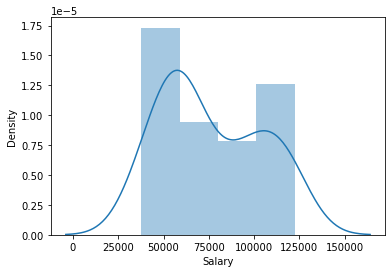

In [46]:
sn.distplot(salary['Salary'])

C:\Users\Vishal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

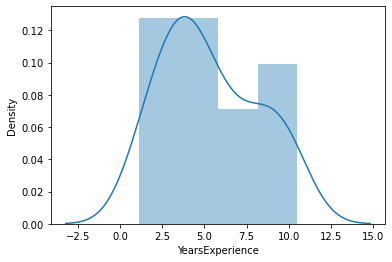

In [47]:
sn.distplot(salary['YearsExperience'])

### Observations :-

The density plot helps the see the distribution of the data and gives insights regarding skewness.

Both the both plots are positively skewed.


### Pair plots

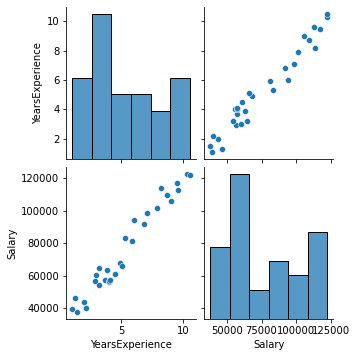

In [48]:
sn.pairplot(salary)

### Observations :-

There is a positive correlation between Salary and Years of experience. As the years of experience increases the salary will increase.

### Heatmap

Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data



<AxesSubplot:>

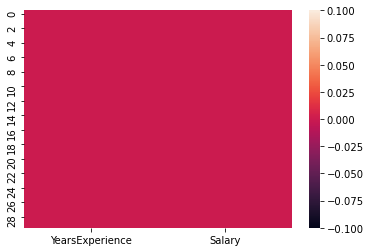

In [49]:
sn.heatmap(salary.isnull())


### Observations :-

We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background.
We can check missing values by using isna() method as well.

In [50]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

### Correlation

The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship (correlation) between various variables and make decisions accordingly.

<AxesSubplot:>

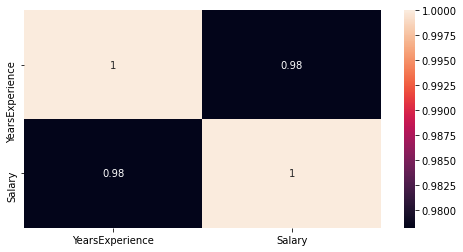

In [51]:
plt.figure(figsize=(8,4))
sn.heatmap(salary.corr(),annot=True)

### Finding Correlation value

In [52]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


We can find the correlation values directly by corr() method. The value is 0.978 which is high, so we can say Salary and Experience are having high positive correlation.

### Fitting a linear regression model

We need to predict the Salary based on Experience. We have one dependent variable Salary and and one independent variable Experience. So we can use linear regression algorithm to predict and fit the line.

In [53]:
model = smf.ols('Salary~YearsExperience',salary).fit()

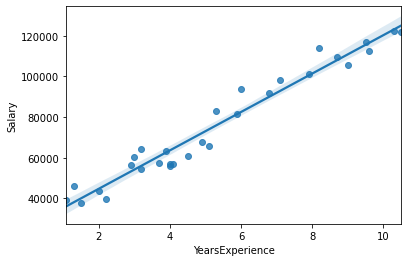

In [54]:
sn.regplot(x="YearsExperience", y="Salary",data=salary);

### Coffecients of model

In [55]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

### t and p values

In [56]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


### R squared values

In [57]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

### Predict Salary for new Experience values

In [58]:
newdata = pd.Series([12,14,16])

Creating a new series for Experience in years with values 12,14 and 16. We will using these data points and predict the Salary.

In [59]:
exp_newdata = pd.DataFrame(newdata,columns=['YearsExperience'])

In [60]:
exp_newdata

,YearsExperience
0,12
1,14
2,16


In [61]:
model.predict(exp_newdata)

0    139191.748056
1    158091.672699
2    176991.597342
dtype: float64

For Years of experience 12,14 and 16 we get the predicted values of Salary as 139191.748056, 158091.672699 and 176991.597342 respectively.